In [1]:
import sys
import os
sys.path.insert(0, '../code/')

from a3_gan_template import Generator
import torch
import torch.nn as nn
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [2]:
checkpoints_path = '../../../models_checkpoints/'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [34]:
noise = torch.randn(25, 100).to(device)

In [35]:
generator = nn.DataParallel(Generator(100)).to(device)
checkpoint = os.path.join(checkpoints_path, 'mnist_generator_4.pt')
state_dict = torch.load(checkpoint)
generator.load_state_dict(state_dict)
generator.eval()

DataParallel(
  (module): Generator(
    (generator): Sequential(
      (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace)
      (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.2, inplace)
      (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.2, inplace)
      (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): LeakyReLU(negati

In [36]:
gen_imgs = generator(noise)
save_image(gen_imgs[:25].detach().view(-1, 1, 64, 64),
                '4_epochs.eps',
                nrow=5, normalize=True)

In [26]:
init_noise = torch.randn(1, 100).to(device)
final_noise = torch.randn(1, 100).to(device)

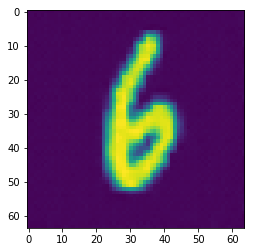

In [27]:
init_gen_img = generator(init_noise.view(-1, 100)).detach().view(64, 64).cpu().numpy()
plt.imshow(init_gen_img)

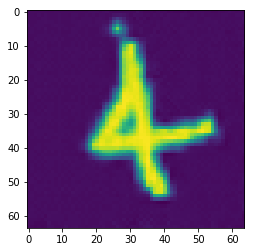

In [28]:
final_gen_img = generator(final_noise.view(-1, 100)).detach().view(64, 64).cpu().numpy()
plt.imshow(final_gen_img)

In [31]:
interpolation_space = torch.FloatTensor(np.array([np.linspace(init_noise[:, i].detach().cpu().numpy(), 
                      final_noise[:, i].detach().cpu().numpy(), 9) for i in range(100)]).T)
interpolation_images = generator(interpolation_space)

In [33]:
save_image(interpolation_images, '../images/interpolation.eps', nrow=9, normalize=True)